# Scikit-learn tutorial
### By Fei Xia, Stanford University

## import modules

In [1]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
%matplotlib inline

## load the digits dataset

In [2]:
digits = datasets.load_digits()

In [3]:
print type(digits)
print digits.keys()

<class 'sklearn.datasets.base.Bunch'>
['images', 'data', 'target_names', 'DESCR', 'target']


In [4]:
# what is this dataset?
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
print digits.data.shape
print digits.data

(1797, 64)
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [6]:
print digits.images.shape
print digits.images[0]

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [7]:
print digits.target.shape
print digits.target

(1797,)
[0 1 2 ..., 8 9 8]


## visualize digits dataset

In [8]:
index = 1600
img = np.zeros((8,8,3))
img[:,:,0] = digits.images[index]
img[:,:,1] = img[:,:,0]
img[:,:,2] = img[:,:,0]
img = (img*255/16).astype('uint8')

label: 2


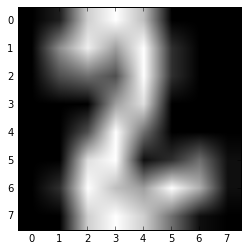

In [21]:
plt.imshow(img)
print 'label:',digits.target[index]

### above is the image, that corresponds to number 0
let's show the data distribution

# classification using SVM

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = svm.SVC(gamma=0.001, C=100.)

In [42]:
classifier.fit(digits.data[:-400], digits.target[:-400])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
y_pred = classifier.predict(digits.data[-400:])

In [44]:
y_truth = digits.target[-400:]

In [45]:
print zip(y_pred, y_truth)

[(4, 4), (4, 4), (7, 7), (2, 2), (8, 8), (2, 2), (2, 2), (5, 5), (7, 7), (9, 9), (5, 5), (4, 4), (8, 8), (8, 8), (4, 4), (9, 9), (0, 0), (8, 8), (0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (0, 0), (9, 9), (5, 5), (5, 5), (6, 6), (5, 5), (0, 0), (9, 9), (8, 8), (9, 9), (8, 8), (4, 4), (1, 1), (7, 7), (7, 7), (3, 3), (5, 5), (1, 1), (0, 0), (0, 0), (2, 2), (2, 2), (7, 7), (8, 8), (2, 2), (0, 0), (1, 1), (2, 2), (6, 6), (3, 3), (3, 3), (7, 7), (3, 3), (3, 3), (4, 4), (6, 6), (6, 6), (6, 6), (4, 4), (9, 9), (1, 1), (5, 5), (0, 0), (9, 9), (5, 5), (2, 2), (8, 8), (2, 2), (0, 0), (0, 0), (1, 1), (7, 7), (6, 6), (3, 3), (2, 2), (1, 1), (7, 7), (4, 4), (6, 6), (3, 3), (1, 1), (3, 3), (9, 9), (1, 1), (7, 7), (6, 6), (8, 8), (4, 4), (3, 3), (1, 1), (4, 4), (0, 0), (5, 5), (3, 3), (6, 6), (9, 9), (6, 6),

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
# calculate confusion matrix
cm = confusion_matrix(y_pred, y_truth)

In [48]:
print cm
# wow, the results are pretty good

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  1  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 1  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  2  0 41  0  0  0  1]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  4  0  0  0  0 38  1]
 [ 0  0  0  0  3  0  0  0  0 39]]
